# Calculating sum of dice outcomes

### Sum of Dice

We had earlier seen the graphs for dice with outcomes = {0,1,2}, and with 2 or 3 flips. What happens when number of flips is large. One could guess it converges to a Normal distribution curve, but we want to see that in action. This poses a unique challenge. Calculating all possible outcomes even for a moderate no of flips (eg, 20) is very large, and takes significant computation times. In this article, we try to solve that. 

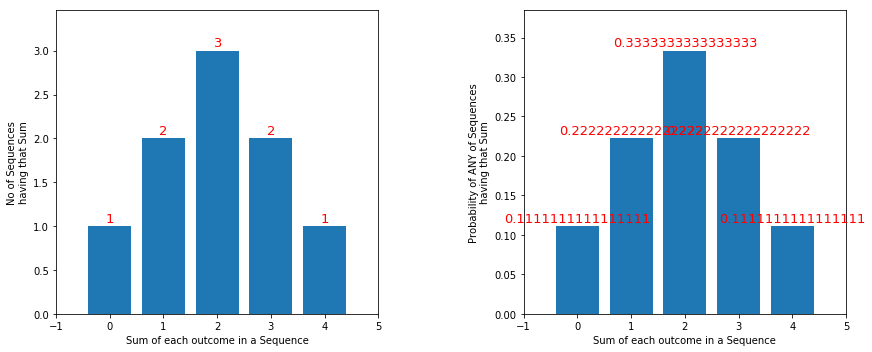

In [30]:
from anyflipviz import get_combinations_consolidated, plot_combinations_consolidated


final_df = get_combinations_consolidated(n_outcomes = 3, n_flips=2)
plot_combinations_consolidated(final_df)

### Slow Algorithm  

Below snippet is an implementation of our slow algorithm we have been using so far.  Note the approach is to compute every possible combination and then simply count them. 

Let,
> 'n' = no of dice or no of tosses (mathematically both are equal)  
> 's' = no of sides or no of outcomes  
> 'p' = the total sum for which we want to calculate no of occurances (In graph this is denoted by X)  

In [2]:
# https://stackoverflow.com/questions/40313058/all-permutations-of-dice-with-a-set-range-and-sum
import itertools
def subsets(n,p,s):
     perms = itertools.product(s, repeat=n)
     for i in perms:
         if sum(i) == p:
             yield i

#### No of tosses = 3, outcomes per dice = {0,1,2}  

In [3]:
n = 3 # no of tosses or no of dices

s = range(0,n) # 0,1,2
p_min = min(s)*n
p_max = max(s)*n
p = range(p_min, p_max+1)  # 0,1,2,3,5,6  p is not probability, but sum, letter p indicating 'points' of dice

result_coeff = []
for i in p:
    result = list(subsets(n,i,s))
    print(result)
    result_coeff.append(len(result))
print(result_coeff)

[(0, 0, 0)]
[(0, 0, 1), (0, 1, 0), (1, 0, 0)]
[(0, 0, 2), (0, 1, 1), (0, 2, 0), (1, 0, 1), (1, 1, 0), (2, 0, 0)]
[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 1, 1), (1, 2, 0), (2, 0, 1), (2, 1, 0)]
[(0, 2, 2), (1, 1, 2), (1, 2, 1), (2, 0, 2), (2, 1, 1), (2, 2, 0)]
[(1, 2, 2), (2, 1, 2), (2, 2, 1)]
[(2, 2, 2)]
[1, 3, 6, 7, 6, 3, 1]


#### No of tosses = 3, outcomes per dice = {1,2,3}  

In [4]:
n = 3  # no of flips or no of dices

s = range(1,n+1) # s-sided = 1,2,3
p_min = min(s)*n
p_max = max(s)*n
p = range(p_min, p_max+1)  # 2,3,4,5,6, p is not probability, but sum, letter p indicating 'points' of dice

result_coeff = []
for i in p:
    result = list(subsets(n,i,s))
    print(result)
    result_coeff.append(len(result))
print(result_coeff)

[(1, 1, 1)]
[(1, 1, 2), (1, 2, 1), (2, 1, 1)]
[(1, 1, 3), (1, 2, 2), (1, 3, 1), (2, 1, 2), (2, 2, 1), (3, 1, 1)]
[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 2, 2), (2, 3, 1), (3, 1, 2), (3, 2, 1)]
[(1, 3, 3), (2, 2, 3), (2, 3, 2), (3, 1, 3), (3, 2, 2), (3, 3, 1)]
[(2, 3, 3), (3, 2, 3), (3, 3, 2)]
[(3, 3, 3)]
[1, 3, 6, 7, 6, 3, 1]


Note that, when no of outcomes = {1,2,3...}, starting with non zero outcome like 1 here, the minimum sum would be min(s)*n, that is, if no of flips = 3, minimum sum = (1,1,1) = 3, so our X value starts from that, instead of 0 like earlier cases. Note this results in graph shifting in X axis. 

### Faster Algorithm 

Fortunately we have a formula to make use of as below. This assumes outcomes start with 1. That is if s = 3, it would be {1,2,3} and not {0,1,2}.

The probability of a **n s-sided** dice, to have **sum p** would be 

$$
\color {blue} {P(p,n,s) = \dfrac {1}{s^n} \sum\limits_{k=0}^{k_{max}} (-1)^k \binom {n}{k} \binom {p-sk-1}{n-1} }
$$

where,  

$$
\color {blue} {k_{max} = \Big\lfloor \dfrac {p-n}{s}\Big\rfloor }
$$
is a floor function. If we are interested in only number of favourable outcomes, we could ignore $\frac {1}{s^n}$ whic his just used to calculate probability (which is also what we did in our below implementation)  

For more details about formula, please check [here](http://mathworld.wolfram.com/Dice.html)

In [5]:

def ncr(n, r):
    """
    Calculate n choose r
    https://stackoverflow.com/questions/4941753/is-there-a-math-ncr-function-in-python
    """
    import operator as op
    from functools import reduce
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer//denom

def subsets_turbo(n,p,s):
    """
    Finding no of combinations whose sum is p, for s-sided dice for n-no of flips (or n dices) using formula
    http://mathworld.wolfram.com/Dice.html
    """
    from math import floor
    k_max = floor((p-n)/s)
    
    # summation
    result = 0
    for i in range(0, k_max+1):  # k_max inclusive..
        
        C_1 = (-1)**i
        C_2 = ncr(n, i)
        C_3 = ncr(p-s*i-1,n-1)
        C_4 = C_1*C_2*C_3
        result += C_4
        
    return result
    
# A simple test 

n = 3 # no of flips
s = range(1,n+1) # s-sided = 1,2,3
n_s = len(s)
p_min = min(s)*n
p_max = max(s)*n
p = range(p_min, p_max+1)  # 2,3,4,5,6, p is not probability, but sum, letter p indicating 'points' of dice

result_coeff = []
for i in p:
    result = subsets_turbo(n,i,n_s)
    result_coeff.append(result)
print(result_coeff)

[1, 3, 6, 7, 6, 3, 1]


Converting to our standard pandas dataframe to use our older graphing methods.. 

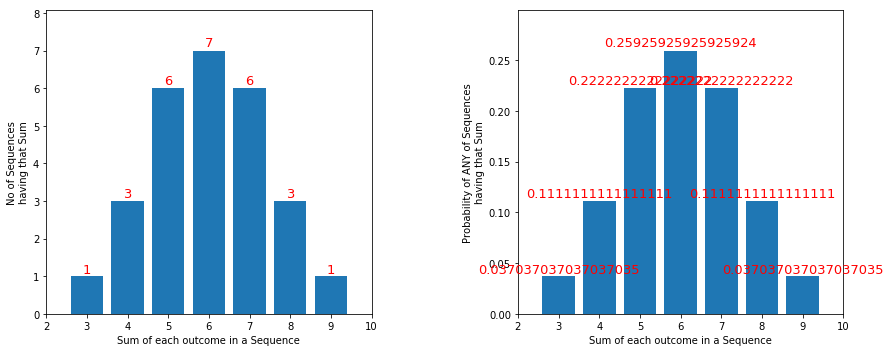

In [26]:
import pandas as pd

def get_combinations_consolidated_turbo(n_outcomes = 3, n_flips = 3):
    """
    Given the  no of outcomes per flip, no of flips, and probability of each sum 
    this will provide dataframe: x, n(x) and p(x)
    WITHOUT CALCULATING INDIVIDUAL COMBINATIONS
    Formula: http://mathworld.wolfram.com/Dice.html
    """
    n = n_flips # no of flips
    
    s = range(1,n_outcomes+1) # s-sided = 1,2,3
    
    n_s = len(s)
    p_min = min(s)*n
    p_max = max(s)*n
    p = range(p_min, p_max+1)  # 2,3,4,5,6, p is not probability, but sum, letter p indicating 'points' of dice   
    
    try:
        X = p
        N = [subsets_turbo(n,i,n_s) for i in p]
        df = pd.DataFrame({'x': X, 'n(x)': N}, dtype='object') #dtype needed to avoid pandas overflow error
        total_outcomes = df['n(x)'].sum()
        df['p(x)'] = df['n(x)']/total_outcomes
        df = df[['x','n(x)','p(x)']]
        return df
    except Exception as e:
        e = str(e)
        print("X:{} Max(N):{} len(N):{} Unexpected error:{}".format(X, max(N), len(N), e))
        raise

final_df = get_combinations_consolidated_turbo(3,3)
plot_combinations_consolidated(final_df)

### No of tosses = 50, outcome = {1,2,3} 

Now we are up to the challenge. 

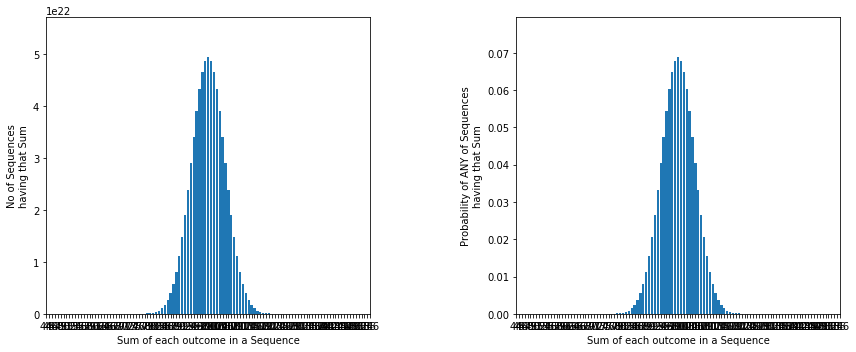

In [29]:
n_flips = 50  # or also indicate no of dices
n_outcomes = 3  # {1,2,3}

final_df = get_combinations_consolidated_turbo(n_outcomes,n_flips)
plot_combinations_consolidated(final_df,label=False)

### Random toss

We will also implement simulation of tossing given dice with given number of outcomes, n no of times. If we consider this as one experiment, then each experiment thus could give only one output out of all possible final sequences. So we will conduct this experiment again a fixed number of times, to see how all outcomes stack up. 

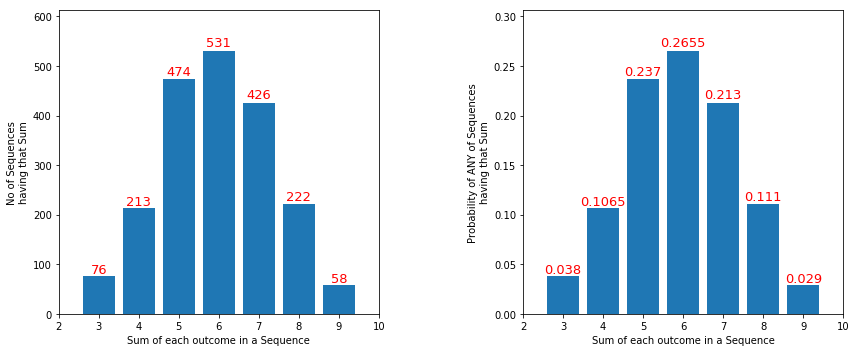

In [44]:
# statistical toss functions.. 
from random import choice, seed
import numpy as np
seed(0)  # just for consistent result every time..   
def toss(n_toss, n_outcomes):
    """
    Toss given dice with n_outcomes, for n_toss times. Each outcome has equal probability.
    Thus a single toss gives a uniform distribution. 
    """

    final_sequence = []
    
    s = range(1,n_outcomes+1) # s-sided = 1,2,3    
    n_s = len(s)
    
    for i in range(n_toss):  # 0 to (n_toss-1) times..
        toss_result = np.random.choice(s) # uniform distribution assumed
        final_sequence.append(toss_result)
        #rint(toss_result)
    return sum(final_sequence)

def sample(n_experiments, n_toss, n_outcomes):
    """
    Conduct experiment given no of times
    In each experiemnt, toss given no of times, and update n_X
    """
    from collections import defaultdict
    samples = defaultdict(lambda: 0)
    for each_experiment in range(0, n_experiments):
        X = toss(n_toss, n_outcomes)  # X is sum of outcome sequence of n_toss        
        samples[X] += 1   # constructing n(X)
        #print(each_experiment, dict(samples))
        
    # convert to pandas
    df = pd.DataFrame([[key,value] for key,value in samples.items()],columns=['x','n(x)'])
    df.sort_values('x', inplace=True)
    total_outcomes = df['n(x)'].sum()
    df['p(x)'] = df['n(x)']/total_outcomes
    return df

n_experiments = 2000
n_toss = 3
n_outcomes  = 3  # or no of sides for the dice
temp_df = sample(n_experiments, n_toss, n_outcomes)
plot_combinations_consolidated(temp_df)

#### Theoretical comparison: 

Let us compare this with our equivalent theoretical outcome..

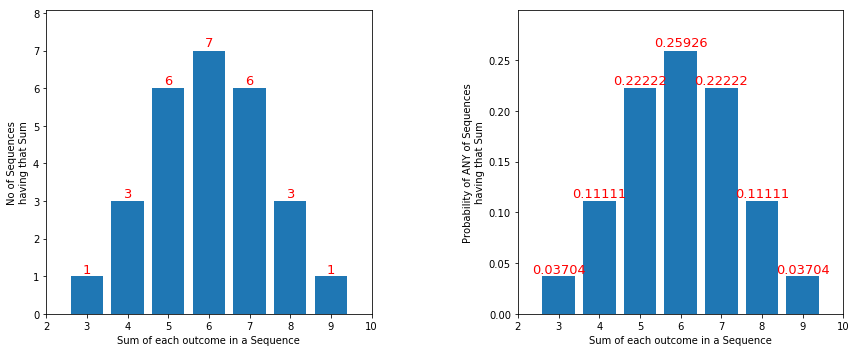

In [48]:
n_toss = 3  # or also indicate no of dices
n_outcomes = 3  # {1,2,3}

final_df = get_combinations_consolidated_turbo(n_outcomes,n_toss)
final_df['p(x)'] = final_df['p(x)'].apply(lambda x: round(x,5))
plot_combinations_consolidated(final_df)

Note how close our probability distributions (RHS) for both theoretical and statistical experiments.  